In [1]:
#The first step is loading our pickel files for dataset

In [2]:
import pickle


infile = open("BSDS_15.pkl",'rb')
dataset = pickle.load(infile) #x,y or clean, noisety
infile.close()

In [3]:
#dataset[0]=first x y pair
#dataset[1]=second x y pair

In [4]:
import torch
train_loader=torch.utils.data.DataLoader(dataset,batch_size=32,shuffle=True)

In [5]:
#Now that the dataset is prepared and shuffled, we can call the model function

In [6]:
!ls

BSDS300      CA6-TEMPLATE.ipynb  dncnn15_0point000001.pt
BSDS_15.pkl  Dataset.ipynb	 my_env
BSDS_25.pkl  Dataset_IVP.ipynb	 ondemand
BSDS_50.pkl  DnCNN_IVP.ipynb	 project1_model.pt
BSDS_OG.pkl  data		 training_dnCNN_IVP.ipynb


In [7]:
#pip install import-ipynb
#https://stackoverflow.com/questions/20186344/importing-an-ipynb-file-from-another-ipynb-file

In [8]:
import import_ipynb


In [9]:
import DnCNN_IVP

importing Jupyter notebook from DnCNN_IVP.ipynb


In [10]:
#Now that it is imported, let us create an instance
model=DnCNN_IVP.DnCNN(1,1,20)
device=torch.device('cuda:0')
model.to(device)

DnCNN(
  (c1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (c2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (c3): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [11]:
from torchsummary import summary
summary(model,input_size=(1,180,180))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 180, 180]             576
            Conv2d-2         [-1, 64, 180, 180]          36,928
       BatchNorm2d-3         [-1, 64, 180, 180]             128
            Conv2d-4         [-1, 64, 180, 180]          36,928
       BatchNorm2d-5         [-1, 64, 180, 180]             128
            Conv2d-6         [-1, 64, 180, 180]          36,928
       BatchNorm2d-7         [-1, 64, 180, 180]             128
            Conv2d-8         [-1, 64, 180, 180]          36,928
       BatchNorm2d-9         [-1, 64, 180, 180]             128
           Conv2d-10         [-1, 64, 180, 180]          36,928
      BatchNorm2d-11         [-1, 64, 180, 180]             128
           Conv2d-12         [-1, 64, 180, 180]          36,928
      BatchNorm2d-13         [-1, 64, 180, 180]             128
           Conv2d-14         [-1, 64, 1

In [12]:
N=200
from torch import nn
class loss_new(nn.Module): #N is dataset size
  def __init__(self):
    super(loss_new,self).__init__()
  def forward(self,out,y,x):
    return torch.norm(out-(y-x))/(2*N) #Where does N get defined?

In [13]:
import torch
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.0001)

In [14]:
criterion=loss_new()

In [30]:
#Need to set a batch size of 128
#Tensor to data loader
def training_function(net, loader, optim, epochs=50):
  loss_list=[]
  #net.train()
  """
    y is the noisy image and it is used as input

    x is the noiseless image and it is used as a target label
  """
  for e in range(epochs): #For each epoch
    train_loss=0
    for clean,noisy in loader:
      noisy = noisy.to(device)
      clean = noisy.to(device)
      prediction = net(noisy)
      batch_loss = criterion(prediction, noisy, clean)
      optim.zero_grad()#zero grad so they don't stack
      batch_loss.backward()
      optim.step()
      train_loss += batch_loss.item()
    train_loss = train_loss/len(loader)
    loss_list.append(train_loss)

    print ("Epoch {}: Has a loss of Loss: {:.3f}".format(e+1 ,train_loss))
  return loss_list
  #return np.mean(train_loss)

In [16]:
plot_me=training_function(model,train_loader,optimizer,50)

epoch change, back to 0?  0
Predicted loss for the batch:  tensor(1.2260, device='cuda:0', grad_fn=<DivBackward0>)
Predicted loss for the batch:  tensor(1.1785, device='cuda:0', grad_fn=<DivBackward0>)
Predicted loss for the batch:  tensor(1.1192, device='cuda:0', grad_fn=<DivBackward0>)
Predicted loss for the batch:  tensor(1.0260, device='cuda:0', grad_fn=<DivBackward0>)
Predicted loss for the batch:  tensor(0.9500, device='cuda:0', grad_fn=<DivBackward0>)
Predicted loss for the batch:  tensor(0.8589, device='cuda:0', grad_fn=<DivBackward0>)
Predicted loss for the batch:  tensor(0.4148, device='cuda:0', grad_fn=<DivBackward0>)
Epoch 1: Has a loss of Loss: 0.968
epoch change, back to 0?  0
Predicted loss for the batch:  tensor(0.7960, device='cuda:0', grad_fn=<DivBackward0>)
Predicted loss for the batch:  tensor(0.8033, device='cuda:0', grad_fn=<DivBackward0>)
Predicted loss for the batch:  tensor(0.8218, device='cuda:0', grad_fn=<DivBackward0>)
Predicted loss for the batch:  tensor(0

Text(0.5, 1.0, 'learning rate of 0.0001')

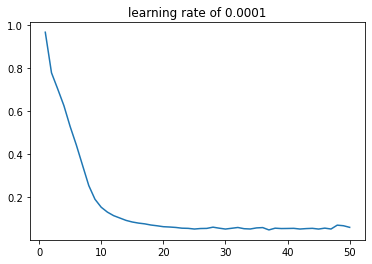

In [21]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,51)], plot_me)
plt.title("learning rate of 0.0001")

In [18]:
# We can't use a learning rate as high as theirs because we didn't take patches so we have less data and if we just learn super fast, model will explode and oscilate

In [22]:
torch.save(model.state_dict(), "dncnn15_0point0001.pt")

In [24]:
loaded=torch.load("dncnn15_0point0001.pt")

In [ ]:
#6 zeros slow
#3 zeros great
#1 zero explodes

In [31]:
model=DnCNN_IVP.DnCNN(1,1,20)
model.to(device)

DnCNN(
  (c1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (c2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (c3): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [32]:
criterion=loss_new()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.0001)

In [33]:
infile = open("BSDS_25.pkl",'rb')
dataset = pickle.load(infile) #x,y or clean, noisety
infile.close()
train_loader=torch.utils.data.DataLoader(dataset,batch_size=32,shuffle=True)

In [34]:
plot_me=training_function(model,train_loader,optimizer,50)

Epoch 1: Has a loss of Loss: 0.810
Epoch 2: Has a loss of Loss: 0.732
Epoch 3: Has a loss of Loss: 0.642
Epoch 4: Has a loss of Loss: 0.566
Epoch 5: Has a loss of Loss: 0.487
Epoch 6: Has a loss of Loss: 0.406
Epoch 7: Has a loss of Loss: 0.287
Epoch 8: Has a loss of Loss: 0.156
Epoch 9: Has a loss of Loss: 0.092
Epoch 10: Has a loss of Loss: 0.069
Epoch 11: Has a loss of Loss: 0.063
Epoch 12: Has a loss of Loss: 0.064
Epoch 13: Has a loss of Loss: 0.052
Epoch 14: Has a loss of Loss: 0.059
Epoch 15: Has a loss of Loss: 0.048
Epoch 16: Has a loss of Loss: 0.086
Epoch 17: Has a loss of Loss: 0.086
Epoch 18: Has a loss of Loss: 0.085
Epoch 19: Has a loss of Loss: 0.043
Epoch 20: Has a loss of Loss: 0.059
Epoch 21: Has a loss of Loss: 0.064
Epoch 22: Has a loss of Loss: 0.088
Epoch 23: Has a loss of Loss: 0.090
Epoch 24: Has a loss of Loss: 0.085
Epoch 25: Has a loss of Loss: 0.154
Epoch 26: Has a loss of Loss: 0.088
Epoch 27: Has a loss of Loss: 0.084
Epoch 28: Has a loss of Loss: 0.078
E